# Análisis de Música en Spotify

En este proyecto, exploramos un conjunto de datos de Spotify para entender las características que definen diferentes tracks. A través de la visualización de datos y el Análisis Exploratorio de Datos (EDA), pudimos observar cómo varían diferentes características como la valencia, energía, danceability y acústica entre diferentes géneros y a lo largo del tiempo. Esto nos proporciona una visión clara de cómo las preferencias musicales y las tendencias han evolucionado, y cómo ciertos atributos musicales están asociados con la popularidad de una canción en Spotify.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("./data.csv")
year_data = pd.read_csv('./data_by_year.csv')
genre_data = pd.read_csv('./data_by_genres.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

Vamos a revisar todos los análisis con el objetivo en 'popularidad'. Antes de hacer eso, verifiquemos la correlación entre características considerando algunas de ellas y para eso, voy a utilizar la biblioteca seaborn.


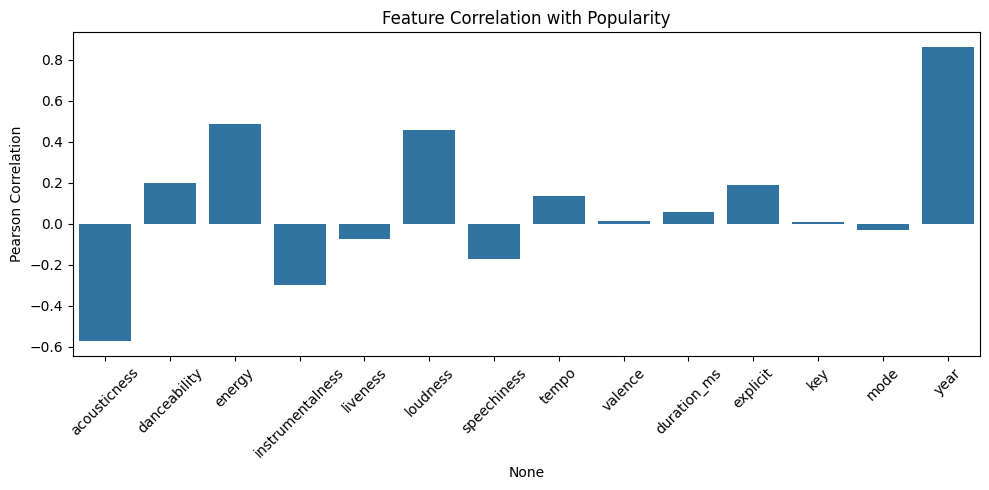

In [2]:
import seaborn as sns

# Lista de características
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

# Calcular la correlación de Pearson
correlations = data[feature_names].apply(lambda x: x.corr(data['popularity']))

# Visualizar las correlaciones en un gráfico de barras sin el argumento palette
plt.figure(figsize=(10, 5))
sns.barplot(x=correlations.index, y=correlations.values)
plt.title("Feature Correlation with Popularity")
plt.ylabel("Pearson Correlation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Entendimiento de los Datos a través de la Visualización y EDA

## Agrupación por Décadas
Para observar las tendencias de la música en intervalos más amplios y reducir la variabilidad anual, agrupamos los datos por décadas. Esto nos da una visión más generalizada de cómo ha evolucionado la música a lo largo del tiempo.


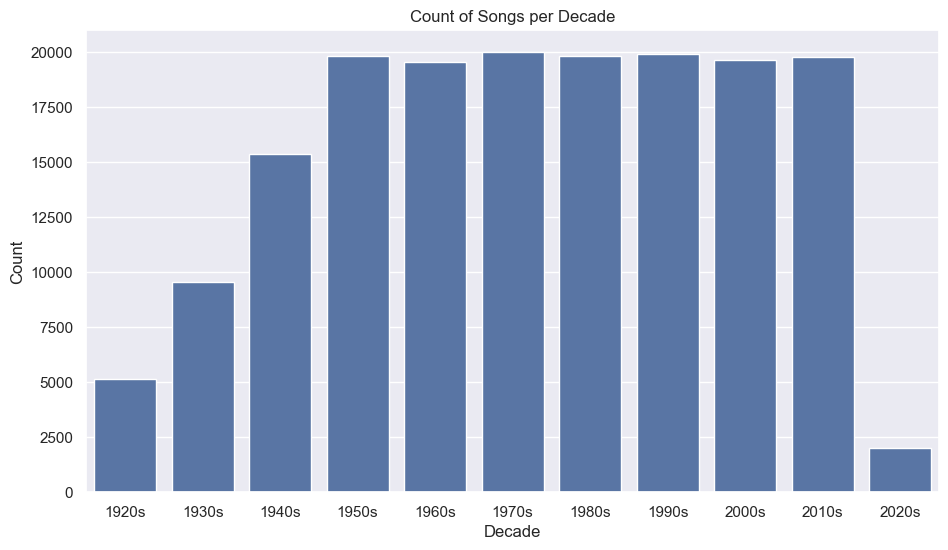

In [3]:
# Definir la función para obtener la década
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

# Crear la columna 'decade'
data['decade'] = data['year'].apply(get_decade)

# Configurar el tamaño del gráfico y mostrar el conteo por década
sns.set(rc={'figure.figsize':(11, 6)})
sns.countplot(x=data['decade'])
plt.title("Count of Songs per Decade")
plt.ylabel("Count")
plt.xlabel("Decade")
plt.show()


# Análisis Año por Año
Para un análisis más detallado y entender cómo cada característica de sonido ha evolucionado anualmente, realizamos un análisis año por año. Esto nos permite observar las fluctuaciones y tendencias anuales en las características del sonido.

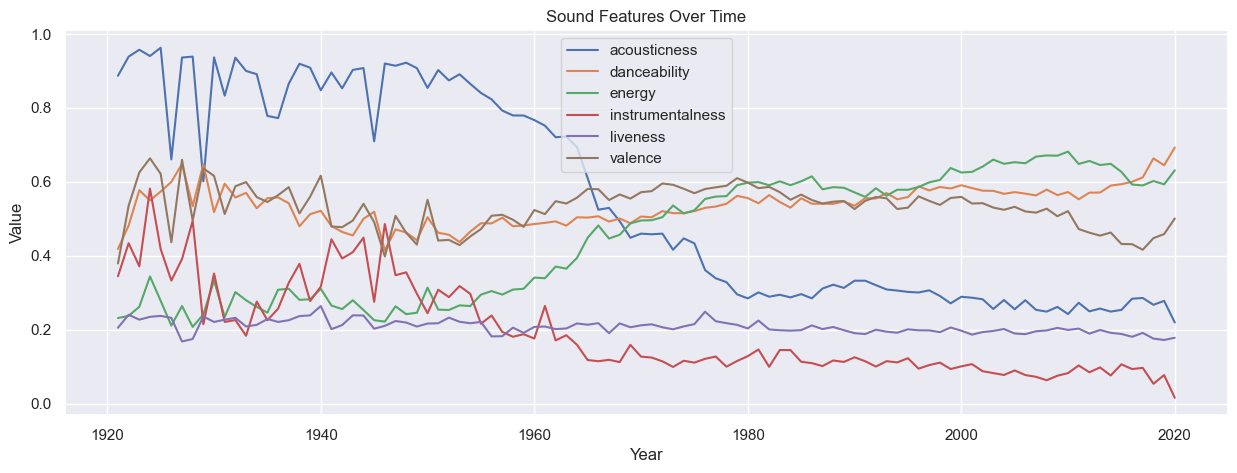

In [4]:
# Asumiendo que 'year_data' es tu DataFrame y 'year' es una columna en 'year_data'
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

plt.figure(figsize=(15, 5))

for feature in sound_features:
    plt.plot(year_data['year'], year_data[feature], label=feature)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Sound Features Over Time')
plt.show()

# Características de Diferentes Géneros
Este conjunto de datos contiene las características de audio para diferentes canciones junto con las características de audio para diferentes géneros. Podemos utilizar esta información para comparar diferentes géneros y entender sus diferencias únicas en sonido.

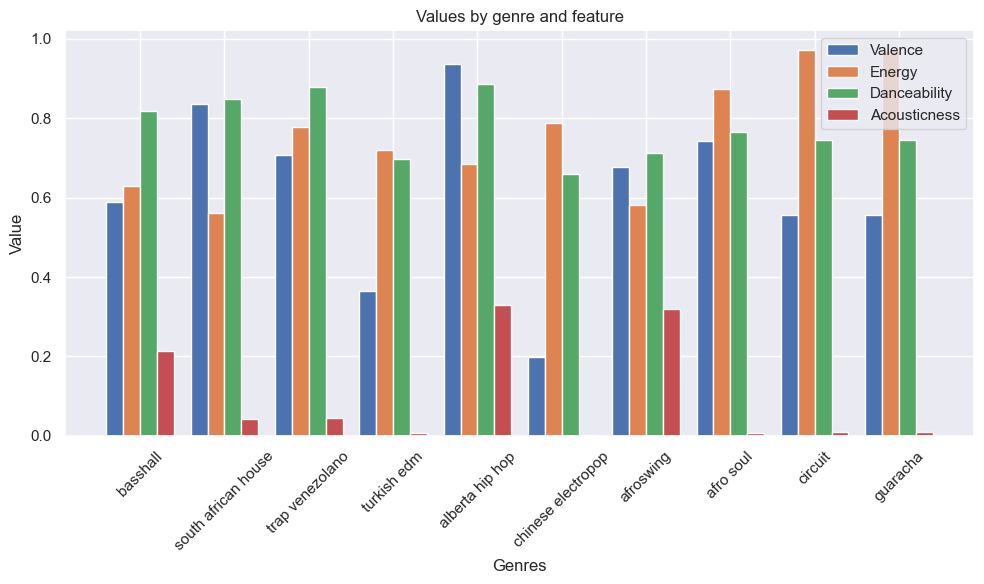

In [5]:
top10_genres = genre_data.nlargest(10, 'popularity')

x = np.arange(len(top10_genres['genres']))  # la etiqueta de ubicaciones
width = 0.2  # el ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 3*width/2, top10_genres['valence'], width, label='Valence')
rects2 = ax.bar(x - width/2, top10_genres['energy'], width, label='Energy')
rects3 = ax.bar(x + width/2, top10_genres['danceability'], width, label='Danceability')
rects4 = ax.bar(x + 3*width/2, top10_genres['acousticness'], width, label='Acousticness')

# Añadir etiquetas, título y leyenda
ax.set_xlabel('Genres')
ax.set_ylabel('Value')
ax.set_title('Values by genre and feature')
ax.set_xticks(x)
ax.set_xticklabels(top10_genres['genres'], rotation=45)
ax.legend()

fig.tight_layout()
plt.show()